In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv("matches.csv")
data.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Unnamed: 7
0,New Zealand,Bangladesh,Bangladesh,8 wickets,Mount Maunganui,"Jan 1-5, 2022",Test # 2444,NaN
1,South Africa,India,South Africa,7 wickets,Johannesburg,"Jan 3-6, 2022",Test # 2445,NaN
2,Australia,England,drawn,NaN,Sydney,"Jan 5-9, 2022",Test # 2446,NaN
3,West Indies,Ireland,West Indies,24 runs,Kingston,8-Jan-22,ODI # 4339,NaN
4,New Zealand,Bangladesh,New Zealand,inns & 117 runs,Christchurch,"Jan 9-11, 2022",Test # 2447,NaN


In [3]:
data.describe()

,Unnamed: 7
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [4]:
data.isnull().sum()

Team 1           0
Team 2           0
Winner           0
Margin        1045
Ground           0
Match Date       0
Scorecard        0
Unnamed: 7    8458
dtype: int64

In [5]:
data = data.iloc[:,:-1]
data.dropna(inplace=True)
data

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,New Zealand,Bangladesh,Bangladesh,8 wickets,Mount Maunganui,"Jan 1-5, 2022",Test # 2444
1,South Africa,India,South Africa,7 wickets,Johannesburg,"Jan 3-6, 2022",Test # 2445
3,West Indies,Ireland,West Indies,24 runs,Kingston,8-Jan-22,ODI # 4339
4,New Zealand,Bangladesh,New Zealand,inns & 117 runs,Christchurch,"Jan 9-11, 2022",Test # 2447
5,South Africa,India,South Africa,7 wickets,Cape Town,"Jan 11-14, 2022",Test # 2448
...,...,...,...,...,...,...,...
8453,England,Australia,Australia,7 runs,The Oval,"Aug 28-29, 1882",Test # 9
8454,England,Australia,England,5 wickets,The Oval,"Sep 6-8, 1880",Test # 4
8455,Australia,England,Australia,10 wickets,Melbourne,"Jan 2-4, 1879",Test # 3
8456,Australia,England,Australia,45 runs,Melbourne,"Mar 15-19, 1877",Test # 1


In [6]:
consistent_team = ['New Zealand', 'South Africa', 'West Indies', 'Australia',
                   'Sri Lanka', 'Afghanistan', 'Oman', 'India', 'Nepal', 'Ireland',
                   'Canada', 'Bahrain', 'Germany', 'Bangladesh', 'U.A.E.', 'Namibia',
                   'Pakistan', 'Malaysia', 'P.N.G.',
                   'Hungary', 'Zimbabwe', 'U.S.A.', 'Netherlands', 'Scotland','England']

In [7]:
data = data[(data['Team 1'].isin(consistent_team)) & (data['Team 2'].isin(consistent_team))]

Text(0.5, 1.0, 'Number of  data  matches won by each team')

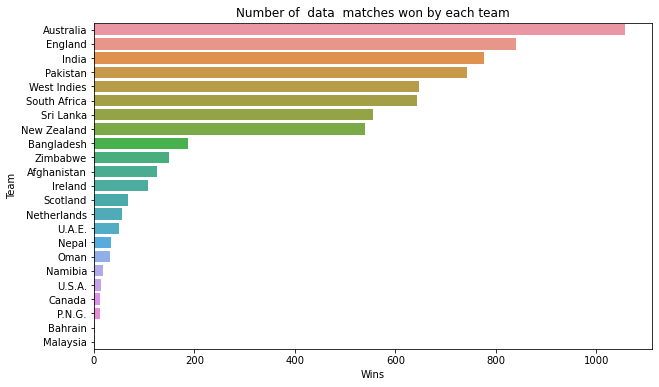

In [8]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'Winner',data = data,order= data['Winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  data  matches won by each team')

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

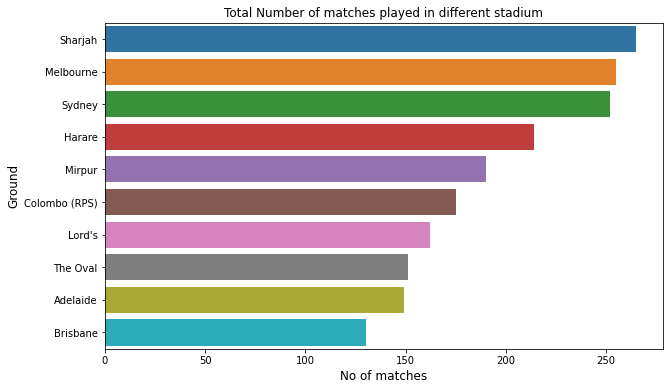

In [9]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'Ground',data = data,order = data['Ground'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Ground',fontsize=12)
plt.title('Total Number of matches played in different stadium')

In [10]:
data.drop(["Margin", "Match Date"], axis=1, inplace=True)

C:\Users\91701\Downloads\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
import re
data.reset_index(inplace = True)

In [12]:
data

,index,Team 1,Team 2,Winner,Ground,Scorecard
0,0,New Zealand,Bangladesh,Bangladesh,Mount Maunganui,Test # 2444
1,1,South Africa,India,South Africa,Johannesburg,Test # 2445
2,3,West Indies,Ireland,West Indies,Kingston,ODI # 4339
3,4,New Zealand,Bangladesh,New Zealand,Christchurch,Test # 2447
4,5,South Africa,India,South Africa,Cape Town,Test # 2448
...,...,...,...,...,...,...
6667,8453,England,Australia,Australia,The Oval,Test # 9
6668,8454,England,Australia,England,The Oval,Test # 4
6669,8455,Australia,England,Australia,Melbourne,Test # 3
6670,8456,Australia,England,Australia,Melbourne,Test # 1


In [13]:
data.head(1000)

,index,Team 1,Team 2,Winner,Ground,Scorecard
0,0,New Zealand,Bangladesh,Bangladesh,Mount Maunganui,Test # 2444
1,1,South Africa,India,South Africa,Johannesburg,Test # 2445
2,3,West Indies,Ireland,West Indies,Kingston,ODI # 4339
3,4,New Zealand,Bangladesh,New Zealand,Christchurch,Test # 2447
4,5,South Africa,India,South Africa,Cape Town,Test # 2448
...,...,...,...,...,...,...
995,1550,New Zealand,Pakistan,Pakistan,Dubai (DSC),T20I # 706
996,1551,Bangladesh,Zimbabwe,Zimbabwe,Sylhet,Test # 2323
997,1552,Australia,South Africa,South Africa,Perth,ODI # 4065
998,1553,India,West Indies,India,Kolkata,T20I # 707


In [14]:
data.replace(to_replace="T20I", value="T_Twenty")

,index,Team 1,Team 2,Winner,Ground,Scorecard
0,0,New Zealand,Bangladesh,Bangladesh,Mount Maunganui,Test # 2444
1,1,South Africa,India,South Africa,Johannesburg,Test # 2445
2,3,West Indies,Ireland,West Indies,Kingston,ODI # 4339
3,4,New Zealand,Bangladesh,New Zealand,Christchurch,Test # 2447
4,5,South Africa,India,South Africa,Cape Town,Test # 2448
...,...,...,...,...,...,...
6667,8453,England,Australia,Australia,The Oval,Test # 9
6668,8454,England,Australia,England,The Oval,Test # 4
6669,8455,Australia,England,Australia,Melbourne,Test # 3
6670,8456,Australia,England,Australia,Melbourne,Test # 1


In [15]:
data.head(1000)

,index,Team 1,Team 2,Winner,Ground,Scorecard
0,0,New Zealand,Bangladesh,Bangladesh,Mount Maunganui,Test # 2444
1,1,South Africa,India,South Africa,Johannesburg,Test # 2445
2,3,West Indies,Ireland,West Indies,Kingston,ODI # 4339
3,4,New Zealand,Bangladesh,New Zealand,Christchurch,Test # 2447
4,5,South Africa,India,South Africa,Cape Town,Test # 2448
...,...,...,...,...,...,...
995,1550,New Zealand,Pakistan,Pakistan,Dubai (DSC),T20I # 706
996,1551,Bangladesh,Zimbabwe,Zimbabwe,Sylhet,Test # 2323
997,1552,Australia,South Africa,South Africa,Perth,ODI # 4065
998,1553,India,West Indies,India,Kolkata,T20I # 707


In [16]:
for i in range(0, 6672):
    temp = data["Scorecard"][i].split()
    data["Scorecard"][i] = temp[0]
#     result = re.findall(r'\b[^\d\W]+\b', data['Scorecard'][i])
#     data['Scorecard'][i] = "".join(result)
#     data['Scorecard'] = "".join(re.split("[^a-zA-Z]*", data['Scorecard'][i]))

C:\Users\91701\AppData\Local\Temp/ipykernel_756/1877809138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Scorecard"][i] = temp[0]


In [17]:
data['Scorecard'].unique()

array(['Test', 'ODI', 'T20I'], dtype=object)

In [18]:
data.shape

(6672, 6)

In [19]:
test = data.loc[data['Scorecard'] == "Test"]

In [20]:
test = test[test.Winner != "draw"]

In [22]:
test

,index,Team 1,Team 2,Winner,Ground,Scorecard
0,0,New Zealand,Bangladesh,Bangladesh,Mount Maunganui,Test
1,1,South Africa,India,South Africa,Johannesburg,Test
3,4,New Zealand,Bangladesh,New Zealand,Christchurch,Test
4,5,South Africa,India,South Africa,Cape Town,Test
6,7,Australia,England,Australia,Hobart,Test
...,...,...,...,...,...,...
6667,8453,England,Australia,Australia,The Oval,Test
6668,8454,England,Australia,England,The Oval,Test
6669,8455,Australia,England,Australia,Melbourne,Test
6670,8456,Australia,England,Australia,Melbourne,Test


In [23]:
x = test.drop(["Winner", "Scorecard", "index"], axis=1)
y = test["Winner"]

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
y = le.fit_transform(y)

In [26]:
x['Team 1'] = x['Team 1'].astype('category')
x['Team 1'] = x['Team 1'].cat.codes

In [27]:
x['Team 2'] = x['Team 2'].astype('category')
x['Team 2'] = x['Team 2'].cat.codes

In [28]:
x['Ground'] = x['Ground'].astype('category')
x['Ground'] = x['Ground'].cat.codes

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 7)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,
                               max_features = "auto")

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.7761904761904762
Testing Accuracy : 0.6460807600950119


In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'n_estimators': 200}

In [32]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=100, max_features=3, n_estimators=200)

In [33]:
grid_search.score(x_test, y_test)

0.6365795724465558

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.34365079365079365
Validation Accuracy : 0.33729216152019004


C:\Users\91701\Downloads\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.7777777777777778
Validation Accuracy : 0.6437054631828979


In [36]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.32857142857142857
Validation Accuracy : 0.31353919239904987
